# SUPERVISED CLASSIFICATION OF ARTICLES

In [1]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from datetime import datetime
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline
pd.set_option('display.max_colwidth', 300)

## 1. Load and clean data

In [3]:
meta = pd.read_excel("../articoli_testo_new_8.xlsx", encoding="utf8", 
                     error_bad_lines=False, dtype={'Data': datetime})
meta = meta.replace(np.nan, '', regex=True)

In [4]:
article_id = meta['ID']
print ("Numero totale di articoli: %d" % len(article_id))

Numero totale di articoli: 646


In [5]:
meta['Data'] = pd.to_datetime(meta['Data'])

In [6]:
trend1 = []
for i in meta['Trend 1']:
    trend1.append(i)

#trend2 = []
#for i in meta['Trend 2']:
#    trend2.append(i)
#    
#trend3 = []
#for i in meta['Trend 3']:
#    trend3.append(i)

In [7]:
Trend = []
for i in range(len(article_id)):
    l = []
    if len(trend1[i]): l.append(trend1[i])
    #if len(trend2[i]): l.append(trend2[i])
    #if len(trend3[i]): l.append(trend3[i])
        
    #Trend.append(list(l))
    Trend.append(', '.join(map(str, list(l)))) 
    
Trend[0]

'High Speed Networks'

In [8]:
# Create Tech Dataframe
trend = pd.DataFrame({'ID': article_id, 'Trend': Trend})
trend.head()

,ID,Trend
0,06b826c3fd1612c902336882cfd57e31,High Speed Networks
1,9da605f224479a54bd8e4e16ce859dd8,Future of Gaming and Hyper Reality
2,3387cbe047e9627a88f91cdd224b85c0,
3,d4cc6384a04ab10e8225eafbb3a297d8,
4,592093c38904cad473bbe8db56798234,


In [9]:
articoli = meta[['ID','Titolo','Abstract', 'Data', 'Testo']]
articoli = pd.merge(articoli, trend, on = 'ID')

In [10]:
# remove samples with no tags
articoli['Trend'] = articoli['Trend'].apply(lambda y: '' if len(y)==0 else y)
articoli = articoli[~(articoli['Trend'].str.len() == 0)]
articoli = articoli[~(articoli['Testo'].str.len() == 0)]
articoli = articoli.dropna(subset=['Data'])

In [11]:
len(articoli)
print ("Numero totale di articoli: %d" % len(articoli))

Numero totale di articoli: 480


In [12]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text)
    text = re.sub(r'[?|!|\'|"|#]',r'',text)
    text = re.sub(r'[.|,|)|(|\|/]',r' ',text)
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    
    text = text.replace("\n"," ")
    
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [13]:
def extract_date(df,column):
    df["Anno"] = df[column].apply(lambda x: x.year)
    df["Mese"] = df[column].apply(lambda x: x.month)
    df["Day"] = df[column].apply(lambda x: x.day)

In [14]:
articoli['Titolo'] = articoli['Titolo'].apply(lambda x: clean_text(x))
articoli['Abstract'] = articoli['Abstract'].apply(lambda x: clean_text(x))
articoli['Testo'] = articoli['Testo'].apply(lambda x: clean_text(x))
extract_date(articoli, "Data")

In [15]:
import datetime

def extract_week_number(df, column):
    df["Week"] = df[column].apply(lambda x: datetime.date(int(x.year), int(x.month), int(x.day)).strftime("%V"))
    #datetime.date(articoli['Data'][0].year, articoli['Data'][0].month , articoli['Data'][0].day).strftime("%V")
    
extract_week_number(articoli, "Data")

In [16]:
articoli.head()

,ID,Titolo,Abstract,Data,Testo,Trend,Anno,Mese,Day,Week
0,06b826c3fd1612c902336882cfd57e31,qualcomm s first wi fi e chips are here,,2020-05-28,qualcomm is announcing its first chips with support for wi fi e the brand new version of wi fi that should be faster and more reliable thanks to its access to an expansive additional range of airwaves over which to broadcast two sets of products are being announced today one for phones which sho...,High Speed Networks,2020,5,28,22
1,9da605f224479a54bd8e4e16ce859dd8,hp s high resolution reverb g is a headset for vr gaming,,2020-05-28,hp and microsoft have announced a new version of their high resolution reverb virtual reality headset aimed at vr gamers rather than businesses the reverb g is slated to launch this fall at with us preorders opening today it s got the same resolution and field of view as the first generation rev...,Future of Gaming and Hyper Reality,2020,5,28,22
11,7c1ebdc9013d5757ec12b1d067ed7449,remote work has its perks until you want a promotion,,2020-05-28,in tech industry mythology the san francisco bay area is the unmatched crucible of ideas and execution companies like facebook offer generous salaries and stock awards to lure staff in silicon valleys overheated job market they pay for some of the nations most expensive office space and perks th...,Workforce Transformation,2020,5,28,22
12,77df7c501d59b4edc1381c9bc47cd84b,vesta raises million to fight payment fraud with ai,,2020-05-28,payments solutions provider vesta today announced that it raised million in capital bringing its total raised to over million the company says it will use the financing to grow and accelerate the deployment of its fraud protection and ecommerce payment productspayment fraud is pervasive in billi...,Fintech and future of economy,2020,5,28,22
13,4e6e93f04f7f2d34780c537ac1e5bd93,tom cruise is making a movie in space with spacex and nasa,,2020-05-28,greetings earthlings welcome to another edition of the monitor wireds entertainment news roundup this time around we have news about a labyrinth sequel nearly years later but well take it a new pandemicready movie that was shot on an iphone and tom cruises plans to film in space here let us expl...,Space Exploration and Exploitation,2020,5,28,22


## 2. Remove stopwords from data

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\edoardo.esposito\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords
#stop_words = set(stopwords.words('english'))
stop_words = nltk.corpus.stopwords.words('english')
my_stopwords = ['also','said', 'one', 'may', 'polls', 'sorry', 'like', 'use', 'many', 'make', 'could', 
                'even', 'says', 'new', 'us', 'would', 'time', 'companies', 'moment', 'way', 'using', 'two',
               'across', 'well', 'world', 'first', 'system', 'million', 'systems', 'including', 'example', 'year', 
                'based', 'googletagcmdpushfunction']
stop_words.extend(my_stopwords)

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

articoli['Abstract'] = articoli['Abstract'].apply(lambda x: remove_stopwords(x))
articoli['Titolo'] = articoli['Titolo'].apply(lambda x: remove_stopwords(x))
articoli['Testo'] = articoli['Testo'].apply(lambda x: remove_stopwords(x))

In [19]:
articoli['Txt'] = articoli['Titolo'] + articoli['Testo'] + articoli['Abstract']
del(articoli['Abstract'])
#del(articoli['Titolo'])
del(articoli['Testo'])

In [20]:
articoli.head()

,ID,Titolo,Data,Trend,Anno,Mese,Day,Week,Txt
0,06b826c3fd1612c902336882cfd57e31,qualcomm wi fi e chips,2020-05-28,High Speed Networks,2020,5,28,22,qualcomm wi fi e chipsqualcomm announcing chips support wi fi e brand version wi fi faster reliable thanks access expansive additional range airwaves broadcast sets products announced today phones ship second half routers start shipping immediately key feature chips support wi fi e takes advanta...
1,9da605f224479a54bd8e4e16ce859dd8,hp high resolution reverb g headset vr gaming,2020-05-28,Future of Gaming and Hyper Reality,2020,5,28,22,hp high resolution reverb g headset vr gaminghp microsoft announced version high resolution reverb virtual reality headset aimed vr gamers rather businesses reverb g slated launch fall preorders opening today got resolution field view generation reverb features tracking cameras redesigned contro...
11,7c1ebdc9013d5757ec12b1d067ed7449,remote work perks want promotion,2020-05-28,Workforce Transformation,2020,5,28,22,remote work perks want promotiontech industry mythology san francisco bay area unmatched crucible ideas execution facebook offer generous salaries stock awards lure staff silicon valleys overheated job market pay nations expensive office space perks ensure workers spend lot inside free commuter ...
12,77df7c501d59b4edc1381c9bc47cd84b,vesta raises fight payment fraud ai,2020-05-28,Fintech and future of economy,2020,5,28,22,vesta raises fight payment fraud aipayments solutions provider vesta today announced raised capital bringing total raised company financing grow accelerate deployment fraud protection ecommerce payment productspayment fraud pervasive billion lost due credit card fraud worldwide reports shift pro...
13,4e6e93f04f7f2d34780c537ac1e5bd93,tom cruise making movie space spacex nasa,2020-05-28,Space Exploration and Exploitation,2020,5,28,22,tom cruise making movie space spacex nasagreetings earthlings welcome another edition monitor wireds entertainment news roundup around news labyrinth sequel nearly years later take pandemicready movie shot iphone tom cruises plans film space let explainas might recall weeks ago told rumors flyin...


## 3. Exploratory Analysis

Numero totale di trend: 30


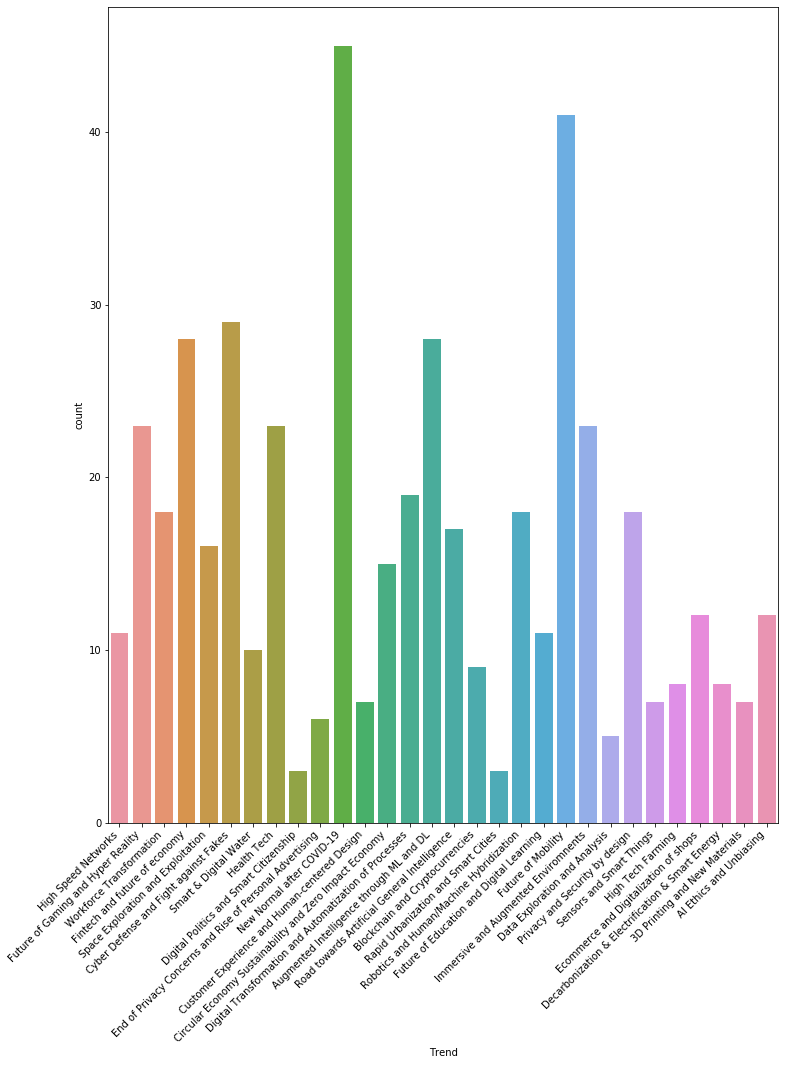

In [21]:
print ("Numero totale di trend: %d" % len(articoli['Trend'].unique()))

plt.figure(figsize=(12,15))
ax=sns.countplot(articoli["Trend"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

<Figure size 432x288 with 0 Axes>

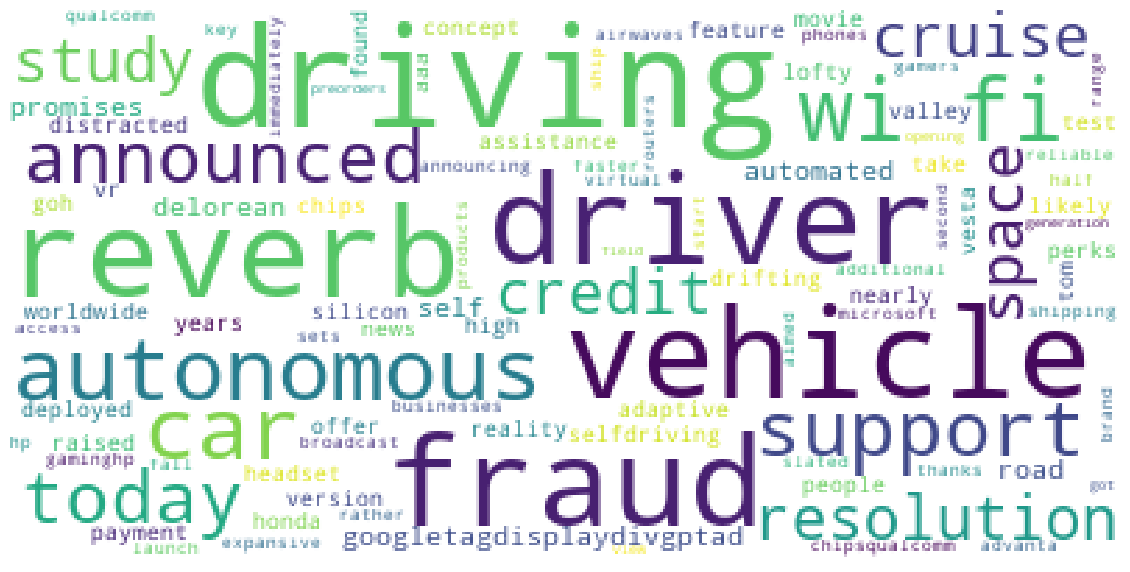

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(articoli['Txt']))

fig = plt.figure(1)
plt.figure(figsize=(20,20)) 
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
import re

corpus = articoli['Txt']
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [24]:
# TODO - List all and remove stopwords
list(cv.vocabulary_.keys())[:5]

['qualcomm', 'wi', 'fi', 'chips', 'support']

In [25]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

In [26]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

[Text(0, 0, 'data'),
 Text(0, 0, 'people'),
 Text(0, 0, 'company'),
 Text(0, 0, 'covid'),
 Text(0, 0, 'technology'),
 Text(0, 0, 'ai'),
 Text(0, 0, 'business'),
 Text(0, 0, 'work'),
 Text(0, 0, 'digital'),
 Text(0, 0, 'customers'),
 Text(0, 0, 'need'),
 Text(0, 0, 'help'),
 Text(0, 0, 'water'),
 Text(0, 0, 'team'),
 Text(0, 0, 'industry'),
 Text(0, 0, 'services'),
 Text(0, 0, 'pandemic'),
 Text(0, 0, 'working'),
 Text(0, 0, 'learning'),
 Text(0, 0, 'percent')]

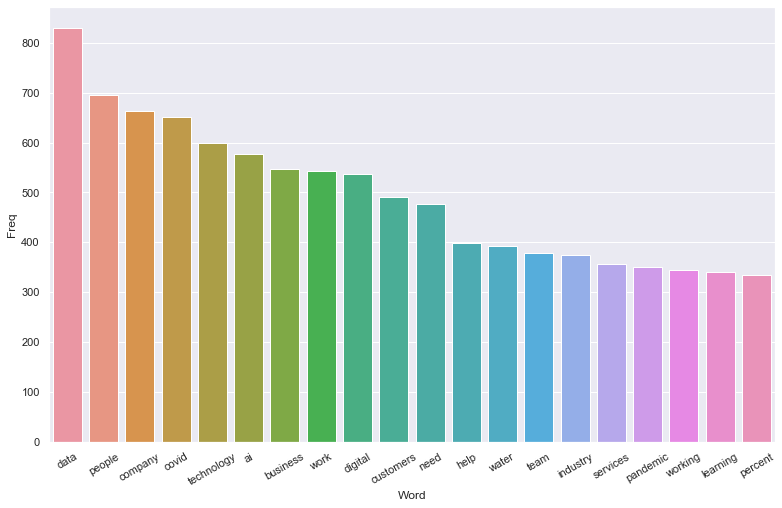

In [27]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

[Text(0, 0, 'machine learning'),
 Text(0, 0, 'artificial intelligence'),
 Text(0, 0, 'united states'),
 Text(0, 0, 'covid pandemic'),
 Text(0, 0, 'long term'),
 Text(0, 0, 'supply chain'),
 Text(0, 0, 'decision making'),
 Text(0, 0, 'supply chains'),
 Text(0, 0, 'climate change'),
 Text(0, 0, 'public health'),
 Text(0, 0, 'vice president'),
 Text(0, 0, 'financial services'),
 Text(0, 0, 'covid crisis'),
 Text(0, 0, 'deep learning'),
 Text(0, 0, 'social distancing'),
 Text(0, 0, 'next normal'),
 Text(0, 0, 'water treatment'),
 Text(0, 0, 'senior partner'),
 Text(0, 0, 'unreal engine'),
 Text(0, 0, 'contact tracing')]

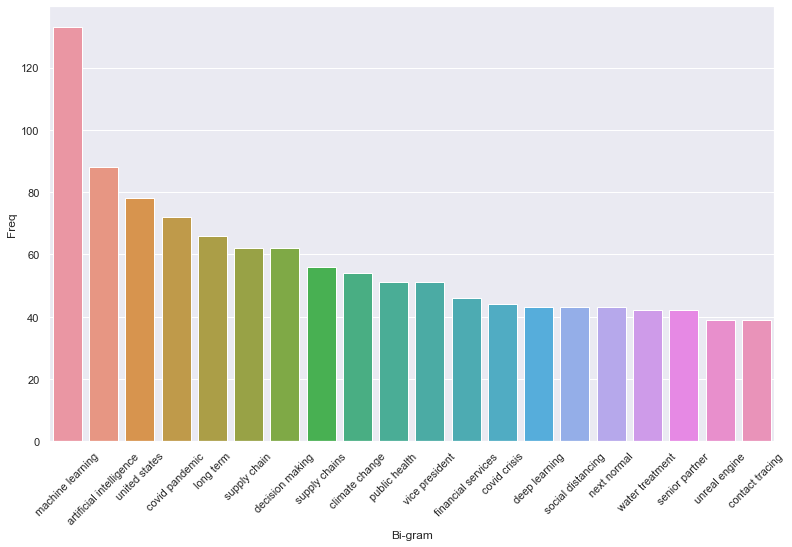

In [28]:
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
#print(top2_df)

#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h = sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

## 4. Extract keywords for each row

In [29]:
#https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)

# get feature names
feature_names=cv.get_feature_names()

In [30]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [31]:
def extract_keys_for_row(doc, n):  
    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())
    
    #extract only the top n
    keywords=extract_topn_from_vector(feature_names,sorted_items, n)
    
    kw = []
    for k in keywords:
        kw.append(k)
        
    return ",".join(kw)
        
extract_keys_for_row(articoli['Txt'][1], 25)

'reverb,hp,headset,vr,valve,mixed reality,mixed,resolution,lenses,reality,windows,index,tracking,field view,lineup,pixels,controllers,controller,rift,speakers,setup,oculus,microsoft,redesigned,hz'

In [32]:
# TODO whitelisting for useful words?
articoli['Keywords'] = articoli['Txt'].apply(lambda x: extract_keys_for_row(x,25))
articoli.head()

,ID,Titolo,Data,Trend,Anno,Mese,Day,Week,Txt,Keywords
0,06b826c3fd1612c902336882cfd57e31,qualcomm wi fi e chips,2020-05-28,High Speed Networks,2020,5,28,22,qualcomm wi fi e chipsqualcomm announcing chips support wi fi e brand version wi fi faster reliable thanks access expansive additional range airwaves broadcast sets products announced today phones ship second half routers start shipping immediately key feature chips support wi fi e takes advanta...,"wi fi,wi,chips,fi,ghz,qualcomm,ghz spectrum,spectrum,gbps,support,snapdragon,high end,phone,end,theoretical,streams,range,top,phones,start,quick,fall,line,devices,announced"
1,9da605f224479a54bd8e4e16ce859dd8,hp high resolution reverb g headset vr gaming,2020-05-28,Future of Gaming and Hyper Reality,2020,5,28,22,hp high resolution reverb g headset vr gaminghp microsoft announced version high resolution reverb virtual reality headset aimed vr gamers rather businesses reverb g slated launch fall preorders opening today got resolution field view generation reverb features tracking cameras redesigned contro...,"reverb,hp,headset,vr,valve,mixed reality,mixed,resolution,lenses,reality,windows,index,tracking,field view,lineup,pixels,controllers,controller,rift,speakers,setup,oculus,microsoft,redesigned,hz"
11,7c1ebdc9013d5757ec12b1d067ed7449,remote work perks want promotion,2020-05-28,Workforce Transformation,2020,5,28,22,remote work perks want promotiontech industry mythology san francisco bay area unmatched crucible ideas execution facebook offer generous salaries stock awards lure staff silicon valleys overheated job market pay nations expensive office space perks ensure workers spend lot inside free commuter ...,"remote,workers,zuckerberg,remote workers,remote work,work,facebook,executives,office,bay area,hard,bay,silicon,managers,tech,salaries,outside,area,expects,school,dont,offices,culture,last week,generally"
12,77df7c501d59b4edc1381c9bc47cd84b,vesta raises fight payment fraud ai,2020-05-28,Fintech and future of economy,2020,5,28,22,vesta raises fight payment fraud aipayments solutions provider vesta today announced raised capital bringing total raised company financing grow accelerate deployment fraud protection ecommerce payment productspayment fraud pervasive billion lost due credit card fraud worldwide reports shift pro...,"fraud,vesta,payment,transaction,fraud detection,transactions,account,protection,detection,card,decisioning,aipowered,analysts,data,prevention,ecommerce,credit card,attempts,cards,models,spot,solutions,realtime,patterns,trained"
13,4e6e93f04f7f2d34780c537ac1e5bd93,tom cruise making movie space spacex nasa,2020-05-28,Space Exploration and Exploitation,2020,5,28,22,tom cruise making movie space spacex nasagreetings earthlings welcome another edition monitor wireds entertainment news roundup around news labyrinth sequel nearly years later take pandemicready movie shot iphone tom cruises plans film space let explainas might recall weeks ago told rumors flyin...,"film,movie,cruise,spacex,tom,nasa,iphone,news,jim,directed,space,might,wrote,theres,hollywood,deadlines,report,shoot,oh,musks,elon musks,marvel,italian,guy,flying"


In [33]:
# per Art Tags
#articoli.to_csv('articoli-keyword.csv', sep=";") 

## 5. Train classification model

In [34]:
# convert text to features
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(articoli['Trend'])

MultiLabelBinarizer(classes=None, sparse_output=False)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
#tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
tfidfconverter = TfidfVectorizer(min_df=5, max_df=0.7, stop_words=stop_words)
X = tfidfconverter.fit_transform(articoli['Txt']).toarray()

In [36]:
# https://stackabuse.com/text-classification-with-python-and-scikit-learn/
# INTERESTING FOR SAVING MODEL
from pandas import Series
y = Series(articoli['Trend']).values

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [39]:
y_pred = classifier.predict(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#print(confusion_matrix(y_test,y_pred))

In [41]:
#print(classification_report(y_test,y_pred))

In [42]:
print("Accuracy of model: %f" % accuracy_score(y_test, y_pred))

Accuracy of model: 0.447917


In [43]:
#articoli.to_csv('Articoli Taggati v7.csv', sep=";")

## 6. Test classification model with completely different dataset

In [44]:
startup = pd.read_csv('DB Startups.csv', sep=",")
del(startup['Unnamed: 0'])
startup.head()

,Nome,Text
0,1CONTROL,control a startup born from idea to revolutionize and simplify the world of iot products for the smart home has created a wireless device that allows you to replace easily the remote controls for gates and garage through an app on your smartphone
1,200CROWD,"two hundred crowd an equity portal crowdfunding authorized by Consob that allows you to easily invest in private companies not listed and the only in Italy to use a syndication model based on co investment by retail investors and a network of qualified investors such as business angels, venture ..."
2,2MANYAPPS,manyapps manyapps a web marketing agency focused on influencers and brand the startup is to create and develop campaigns to influencer marketing to create app-specific influencers manage social Shopster https socialshopster with an e commerce dedicated to the influencer world manyapps weather co...
3,4 GIFTERS,gifters gifters a and gifting that allows you to make real-time gifts can choose their own gift from proposals for top brand just enter the e mail address or phone number of the birthday you will receive a gift code can also take advantage of the gift team service platform that joins friends to ...
4,ABIBY,abiby abiby a startup that select the best products to make up and cosmetics by sending monthly home beauty box all this is done in a very simple and need to select the most suitable plan months months abiby comporr the beauty box specially the beauty box will come and you will be able to test n...


In [45]:
p_trends = []
for row in startup.itertuples():
    test_data = np.array([row[2]])
    testVectorizerArray = tfidfconverter.transform(test_data).toarray()
    p_trends.append(classifier.predict(testVectorizerArray)[0])

In [46]:
p_series = pd.Series(p_trends)

startup = pd.concat([startup,p_series], axis=1)
startup.head()

,Nome,Text,0
0,1CONTROL,control a startup born from idea to revolutionize and simplify the world of iot products for the smart home has created a wireless device that allows you to replace easily the remote controls for gates and garage through an app on your smartphone,Future of Mobility
1,200CROWD,"two hundred crowd an equity portal crowdfunding authorized by Consob that allows you to easily invest in private companies not listed and the only in Italy to use a syndication model based on co investment by retail investors and a network of qualified investors such as business angels, venture ...",Fintech and future of economy
2,2MANYAPPS,manyapps manyapps a web marketing agency focused on influencers and brand the startup is to create and develop campaigns to influencer marketing to create app-specific influencers manage social Shopster https socialshopster with an e commerce dedicated to the influencer world manyapps weather co...,Future of Mobility
3,4 GIFTERS,gifters gifters a and gifting that allows you to make real-time gifts can choose their own gift from proposals for top brand just enter the e mail address or phone number of the birthday you will receive a gift code can also take advantage of the gift team service platform that joins friends to ...,Workforce Transformation
4,ABIBY,abiby abiby a startup that select the best products to make up and cosmetics by sending monthly home beauty box all this is done in a very simple and need to select the most suitable plan months months abiby comporr the beauty box specially the beauty box will come and you will be able to test n...,Future of Mobility


In [47]:
articoli.head()

,ID,Titolo,Data,Trend,Anno,Mese,Day,Week,Txt,Keywords
0,06b826c3fd1612c902336882cfd57e31,qualcomm wi fi e chips,2020-05-28,High Speed Networks,2020,5,28,22,qualcomm wi fi e chipsqualcomm announcing chips support wi fi e brand version wi fi faster reliable thanks access expansive additional range airwaves broadcast sets products announced today phones ship second half routers start shipping immediately key feature chips support wi fi e takes advanta...,"wi fi,wi,chips,fi,ghz,qualcomm,ghz spectrum,spectrum,gbps,support,snapdragon,high end,phone,end,theoretical,streams,range,top,phones,start,quick,fall,line,devices,announced"
1,9da605f224479a54bd8e4e16ce859dd8,hp high resolution reverb g headset vr gaming,2020-05-28,Future of Gaming and Hyper Reality,2020,5,28,22,hp high resolution reverb g headset vr gaminghp microsoft announced version high resolution reverb virtual reality headset aimed vr gamers rather businesses reverb g slated launch fall preorders opening today got resolution field view generation reverb features tracking cameras redesigned contro...,"reverb,hp,headset,vr,valve,mixed reality,mixed,resolution,lenses,reality,windows,index,tracking,field view,lineup,pixels,controllers,controller,rift,speakers,setup,oculus,microsoft,redesigned,hz"
11,7c1ebdc9013d5757ec12b1d067ed7449,remote work perks want promotion,2020-05-28,Workforce Transformation,2020,5,28,22,remote work perks want promotiontech industry mythology san francisco bay area unmatched crucible ideas execution facebook offer generous salaries stock awards lure staff silicon valleys overheated job market pay nations expensive office space perks ensure workers spend lot inside free commuter ...,"remote,workers,zuckerberg,remote workers,remote work,work,facebook,executives,office,bay area,hard,bay,silicon,managers,tech,salaries,outside,area,expects,school,dont,offices,culture,last week,generally"
12,77df7c501d59b4edc1381c9bc47cd84b,vesta raises fight payment fraud ai,2020-05-28,Fintech and future of economy,2020,5,28,22,vesta raises fight payment fraud aipayments solutions provider vesta today announced raised capital bringing total raised company financing grow accelerate deployment fraud protection ecommerce payment productspayment fraud pervasive billion lost due credit card fraud worldwide reports shift pro...,"fraud,vesta,payment,transaction,fraud detection,transactions,account,protection,detection,card,decisioning,aipowered,analysts,data,prevention,ecommerce,credit card,attempts,cards,models,spot,solutions,realtime,patterns,trained"
13,4e6e93f04f7f2d34780c537ac1e5bd93,tom cruise making movie space spacex nasa,2020-05-28,Space Exploration and Exploitation,2020,5,28,22,tom cruise making movie space spacex nasagreetings earthlings welcome another edition monitor wireds entertainment news roundup around news labyrinth sequel nearly years later take pandemicready movie shot iphone tom cruises plans film space let explainas might recall weeks ago told rumors flyin...,"film,movie,cruise,spacex,tom,nasa,iphone,news,jim,directed,space,might,wrote,theres,hollywood,deadlines,report,shoot,oh,musks,elon musks,marvel,italian,guy,flying"


In [48]:
tags = pd.read_csv('art-tags v2.csv', sep=";")
tags = tags.replace(np.nan, '', regex=True)
del (tags["Unnamed: 0"])
del (tags["Titolo"])
del (tags["Trend"])
#del (tags["Tags"])
tags.head()

,ID,Tags,Company,Location,Vertical,Application,Tech,Tag
0,c812e0a3418d624ae60df3ec9e19d184,Tech: Drones,,,,,Drones,
1,0e2ef6bd7619374e0531d1551ab2141e,"Vertical: Advertising, Company: Adobe",Adobe,,Advertising,,,
2,8602d8791a1754506303dcfd9a7b79e3,,,,,,,
3,2157ac6d12e063b6a38c5c0491e0b322,Tag: Future,,,,,,Future
4,89390733d3f9e1f30bae53de5e2d8a04,,,,,,,


In [49]:
tags = pd.merge(articoli, tags, on = 'ID')

In [53]:
tags.head()

,ID,Titolo,Data,Trend,Anno,Mese,Day,Week,Txt,Keywords,Tags,Company,Location,Vertical,Application,Tech,Tag
0,9fa9fe62c30c4f93891c0f59c3cf1b22,marketers need find opportunities land business great reset,2020-05-18,New Normal after COVID-19,2020,5,18,21,marketers need find opportunities land business great resetprior covid event materially changed visitation brickandmortar businesses years shelter place nearing months certain states muscle memory consumption habits physical replaced significant upticks ecommerce restaurant delivery curbside pic...,"muscle memory,muscle,great reset,reset,memory,great,market share,visit,store,visits,marketers,consumption,restaurants,market,businesses,retailers,cost per,share,capture,normal,consumers,dollars,look back,foot traffic,physical",,,,,,,
1,dadf0b440287c86472f10f9ac29536b9,state farm latest deep fake race build perfect streamer monday things,2020-05-18,Cyber Defense and Fight against Fakes,2020,5,18,21,state farm latest deep fake race build perfect streamer monday thingswelcome things adweeks daily resource marketers publishing content things adweekcom morning post prefer come straight inbox sign email herestate farm wraps mvp performance last dance doc adwhen espns last dance premiered month ...,"adweek,meat,farm,streaming,ad,theyve,state,content,foods,presents,dance,guard,netflix,heres,premium,last,race,march,products,perfect,brands,original,story,industry,members","Vertical: Advertising, Vertical: Food",,,Advertising,,,
2,53fdfc944df0a8900af9f16e554f8c01,platform lets shoppers track store reopenings real,2020-05-18,Customer Experience and Human-centered Design,2020,5,18,21,platform lets shoppers track store reopenings realceo retail data analytics firm skypad jay hakami finds phone lot brands top labels michael kors tory burch whose goods sell department stores coast coast past eight weeks hakami phone theyve complaintsales downand theyve wanted know thing stores ...,"stores,hakami,department stores,reopening,department,brands,open,shoppers,retail,sales,wanted,coast,nobody,fell,consumers,app,figures,retailers,theyve,find,goods,map,anyone,whose,phone",Tech: Mobile app,,,,,Mobile app,
3,d9045508fa716f3de34a4d33347a3ef2,results biggest universal basic income trial yet,2020-05-18,Digital Politics and Smart Citizenship,2020,5,18,21,results biggest universal basic income trial yetwidespread job losses due coronavirus pandemic leading renewed interest idea universal basic income ubi coincided perfectly publication results biggest ubi experiment datebut suggest idea panacea americans filed unemployment benefits last months lo...,"ubi,idea,payments,basic,income,results,guardian,welfare,nationwide,biggest,benefits,wellbeing,job,economic,unemployment,universal,employment,state,trial,though,recent,seems,impact,given,relationship",,,,,,,
4,9add1c9bb8186cb2981952df7b97d225,circular fashion software company creates bespoke sustainable shirts,2020-05-18,Circular Economy Sustainability and Zero Impact Economy,2020,5,18,21,circular fashion software company creates bespoke sustainable shirtsspotted software company teemill leading force aim change linear nature fashion industry circular three every five tshirts bought globe end bin within according bbc earth focus making circular supply chain tshirtsthis platform w...,"tshirt,teemill,cotton,fashion,packaging,materials,software company,organic,label,renewable energy,renewable,part,springwise,waste,creates,sustainable,material,chance,innovations,weve,energy,aim change,free,uses,toxic","Application: Renewables, Vertical: Energy, Vertical: Fashion",,,Energy,Renewables,,


In [51]:
# Per Anomaly Detection
tags.to_csv('Articoli Taggati v7.csv', sep=";")